In [ ]:
import pdb
import glob
import math
import numpy as np
import pandas as pd
import xarray as xr
import datetime as dt
import matplotlib as mpl
import mpl_toolkits.mplot3d 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from cmath import inf
from scipy import stats
from sklearn import datasets
from sklearn.cluster import KMeans

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from google.colab import drive, data_table
drive.mount('/content/drive', force_remount=True)


"""
Autor: Sebastian Carmona
"""

Mounted at /content/drive


'\nAutor: Sebastian Carmona\n'

# Redes neuronales

In [ ]:
import pdb
# import numba
import random
import numpy as np
import scipy.io as sio 
import matplotlib.pyplot as plt

from scipy import stats
from itertools import combinations_with_replacement

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

"""
Autor: Sebastian Carmona
"""

Mounted at /content/drive


'\nAutor: Sebastian Carmona\n'

## Funciones auxiliares

In [ ]:
def Modelo(method,**kwargs):
    if method == 'svm_linear':
        model = SVC(kernel='linear')
    elif method == 'svm_rbf':
        model = SVC(kernel='rbf')
    elif method == 'svm_polynomial':
        model = SVC(kernel='poly',degree=kwargs['polynomial_degree'])
    elif method == 'linear_regression':
        model = LinearRegression()
    elif method == 'logistic_regression':
        model = LogisticRegression()
    elif method == 'Tree':
        model = DecisionTreeClassifier(max_depth=kwargs['depth'], max_features=kwargs['number_features'])
    return model

def calculate_n(epsilon, delta, method, **kwargs):
    if method=='svm_linear':
        length_H=kwargs['number_features']+1
    elif method=='svm_rbf':
        length_H=inf
    elif method=='svm_polynomial':
        length_H=comb(kwargs['number_features']+kwargs['polynomial_degree']-1,kwargs['polynomial_degree'])+1
    elif method=='linear_regression':
        length_H=kwargs['number_features']+1
    elif method=='logistic_regression':
        length_H=kwargs['number_features']+1

    if method=='Tree':
        n=(np.log(2)/(2*(epsilon)**2))*(((2**kwargs['depth'])-1)*(1+np.log2(kwargs['number_features']))+1+np.log(1/delta))
    else:
        n=((1/epsilon)*(np.log(length_H)+np.log((1/delta))))
    
    if n!=inf:
        n=math.ceil(n)
    
    return n 

def comb(n, k):
  out = int(math.factorial(n) / (math.factorial(k) * math.factorial(n - k)))
  return out

In [ ]:
def site_location(lat=0, lon=0):
  sites = {(48.44424057006836, -4.4123148918151855): 'Brest', 
           (48.77284622192383, 2.012406349182129): 'Trappes'}
  try:
    return sites[(lat, lon)]
  except:
    return 'Not known site'

def title1(mytitle, coef):
    """
    inclus le titre au document.
        @param mytitle: titre du document.
        @param coef : coefficient GFAT (renvoye par la fonction formatGFAT).
    """

    plt.figtext(0.5, 0.95, mytitle, fontsize=6.5*coef, fontweight='bold',
                horizontalalignment='center', verticalalignment='center')
    return


def title2(mytitle, coef):
    """
    inclus le sous titre au document.
        @param mytitle: titre du document.
        @param coef : coefficient GFAT (renvoye par la fonction formatGFAT).
    """

    plt.figtext(0.5, 0.89, mytitle, fontsize=5.5*coef,
                horizontalalignment='center', verticalalignment='center')
    return


def title3(mytitle, coef):
    """
    inclus le sous sous titre au document.
        @param mytitle: titre du document.
        @param coef : coefficient GFAT (renvoye par la fonction formatGFAT).
    """
    plt.figtext(0.5, 0.85, mytitle, fontsize=4.5*coef,
                horizontalalignment='center', verticalalignment='center')
    return

def gapsizer(ax, time, range, gapsize, colour='#c7c7c7'):
    """
    This function creates a rectangle of color 'colour' when time gap 
    are found in the array 'time'. 
    """
        # search for holes in data
    # --------------------------------------------------------------------
    dif_time = time[1:] - time[0:-1]
    print(type(dif_time))
    for index, delta in enumerate(dif_time):
        # pdb.set_trace()
        if delta > np.timedelta64(gapsize, 'm'):
            # missing hide bad data
            start = mdates.date2num(time[index])
            end = mdates.date2num(time[index + 1])
            width = end - start

            # Plot rectangle
            end = mdates.date2num(time[index + 1])
            rect = mpl.patches.Rectangle(
                (start, 0), width, np.nanmax(range),
                color=colour)
            ax.add_patch(rect)

def plot_as_me(ds, channel, axes, qt, wl, signal_mode, attrs, save_fig=False, **kwargs):
  cmap = mpl.cm.jet
  bounds = np.linspace(0, 100, 64)
  norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

  title1('{instr} {mode} {qt} at {wl} {wlu}'.format(instr=attrs['instrument_id'],
                                                            mode=signal_mode,
                                                            qt=qt,
                                                            wl=wl,
                                                            wlu='nm'), coef=2.5)
  title2(str(ds.time.values[0].astype('datetime64[D]')), coef=2.5)

  title3('{} ({:.1f}N, {:.1f}E)'.format(site_location(float(ds.lat.data[0]), float(ds.lon.data[0])), 
                                           float(ds.station_latitude), 
                                           float(ds.station_longitude)), coef=2.5)
  
  q = ds[channel].sel(range=slice(0, 5)).plot.pcolormesh(x='time', 
                 y='range', 
                 cmap='jet', 
                 vmin=kwargs['vmin'], 
                 vmax=kwargs['vmax'],
                 # norm=norm
                 )
  
  plt.subplots_adjust(left=0, bottom=0, right=1, top=0.8, wspace=0, hspace=0)
  myFmt = mdates.DateFormatter('%H')
  axes.xaxis.set_major_formatter(myFmt)
  

  gapsizer(axes, ds.time.values, ds.range, gapsize=6, colour='#c7c7c7')
  axes.set_xlim([ds.time[0].values.astype('datetime64[D]'), ds.time[0].values.astype('datetime64[D]')+np.timedelta64(1,'D')])
  q.cmap.set_over('white')
  if save_fig:
    year, month, day = str(ds.time[0].values.astype('datetime64[D]')).split('-') 
    out_dir =  '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/Proyecto Avanzado II/Workbench/output_dir/images'
    fl_name = '{instru}_{qt}_{wl}_{mode}_mode_{y}{m}{d}.jpg'.format(instru=attrs['system'], qt=qt, wl=wl, mode=signal_mode, y=year, m=month, d=day)
    fl_name = os.path.join(out_dir, fl_name)
    plt.savefig(fl_name, dpi=200)


In [ ]:
def activation_func(funct_name, derivate_flag=False):
  """
  Give the activation funciton for the neuron or the layer.

  Parameters:
  ----------
  funct_name: str
    - Name of the activation funciton to return

  Returns:
  --------
    act_funct: lamda function
      - Lambda function
  """
  def linear(x: float):
    if derivate_flag:
      return np.reshape([1], (x.shape))
    else:
      return x
  def binary_step(x: float):
    if derivate_flag:
      return np.reshape([0], (x.shape))
    else:  
      if x > 0:
        return np.reshape([1.], (x.shape))
      elif x == 0:
        return np.reshape([.5], (x.shape))
      else:
        return np.reshape([0], (x.shape))
  def sigmoid(x: float, derivate_flag=False):
    if derivate_flag:
      return sigmoid(x) * (1 - sigmoid(x)) 
    else:
      return 1/(1 + np.exp(-x))
  def tanh(x: float, derivate_flag=False):
    if derivate_flag:
      return 1 - tanh(x)**2
    else:
      return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
  def ReLU(x: float):
    if derivate_flag:
      if x < 0:
        return np.reshape([0], (x.shape))
      else:
        return np.reshape([1], (x.shape))
    else:
      if x < 0:
        return np.reshape([0], (x.shape))
      else:
        return x

  if funct_name == 'linear':
    return lambda v: linear(v)
  elif funct_name == 'binary_step':
    return lambda v: binary_step(v)
  elif funct_name == 'sigmoid':
    return lambda v: sigmoid(v, derivate_flag=derivate_flag)
  elif funct_name == 'tanh':
    return lambda v: tanh(v, derivate_flag=derivate_flag)
  elif funct_name == 'ReLU':
    return lambda v: ReLU(v)
  else:
    print('Invalid activation function')

def init_layers(n_layers: int, layers_params: dict, last_layer_n: int, bias_flag=False):
  """
  Creates a multilayer hiding layer.

  Parameters:
  ----------
  - n_layers: int 
    Number of layers within the hiding layer
  - layer params: list of list
    A list with the layer initialization parameters, i.e:
      [[4, 'sigmoid'], [5, linear]]
    The len of layer_params must be equal to the n_layers.
  
  Return:
  -------
  - layers: list o lists
    A list such that its elements are a list with the "neurons" of the layer.
  - ws: list of lists
    A list such that its elemants are the weight matrix for the one layer.
  """
  if not len(layers_params) == n_layers:
    print('ERROR: n_layers must be equal to len(layer_params)')
  else:
    layers = [[], []]
    ws = []

    for layer in layers_params.keys():
      layers[0].append([activation_func(layers_params[layer]['activation_f']) for neuron in range(layers_params[layer]['n_neurons'])])
      layers[1].append([activation_func(layers_params[layer]['activation_f'], derivate_flag=True) for neuron in range(layers_params[layer]['n_neurons'])])

    if bias_flag:

      ws.append(np.random.rand(layers_params[list(layers_params.keys())[0]]['n_neurons'], last_layer_n + 1))
      for layer in list(layers_params.keys())[1:]:
        ws.append(np.random.rand(layers_params[layer]['n_neurons'], len(ws[-1])+1)) 
    else:

      ws.append(np.random.rand(layers_params[list(layers_params.keys())[0]]['n_neurons'], last_layer_n))
      for layer in list(layers_params.keys())[1:]:
        ws.append(np.random.rand(layers_params[layer]['n_neurons'], len(ws[-1]))) 


    return layers, ws


def train(X, y, input_layer, hdn_layer, output_layer, w, eta=0.5,epochs=10, mode='sequential', tol=1e-2, bias_flag=False):
  """
  Train the model with the layers and inputs given.

  Parameters:
  -----------
  - X: list
    Array of the data to train the modelo.

  - y: list
    Reference to calculate the output error.

  - input_layer: list
    List of the neurons in the input layer. Every element
    is a neuron.

  - hdn_layer: list of lists
    List of the layers within the hiding layer. Eery element
    is a list in which its elemenst are the neurons of the
    layer.

  - output_layer: list
    List of the output layer. Its elemenst are the neurons of
    output layer.

  - epochs: int
    Number of epocj to train the model.
  
  - mode: str.
    Mode of the backpropagation. posible modes:
      - sequential: Update the weights after every 
        observstion (patron).
      - batch: update the weights after every 
        epoch.

  Returns:
  --------
  # - w: list of list.
  #   Weights of very layer.

  - grads: list of lists.
    Gradients of every layer.

  """ 
  out = []
  errors = []
  grads = [] 
  if mode == 'sequential':
    for epoch in range(epochs):
      print('Epoch: {}'.format(epoch))
      for patron, d in zip(X, y):
        ys = np.array(propagate(patron, input_layer=input_layer[0], hdn_layer=hdn_layer[0], output_layer=output_layer[0], w=w, bias_flag=bias_flag),dtype=object)
        dys = propagate(patron, input_layer=input_layer[1], hdn_layer=hdn_layer[1], output_layer=output_layer[1], w=w, bias_flag=bias_flag)
        # pdb.set_trace()

        error = np.array(d, dtype=np.float64) - np.array(ys[-1], dtype=np.float64)
        
        if bias_flag:

          d_energy = - (np.array(error, dtype=np.float64) * np.array(dys[-1], dtype=np.float64)) * np.reshape(np.append(ys[-2], [[1]], axis=0), (-1,))
          delta_w_out = - eta * d_energy

          grad = []
          grad.append(np.array(error * dys[-1], dtype=np.float64).reshape(-1, 1))
          for i in np.arange(2, len(ys), 1):
            grad.append(np.array((np.ravel(dys[-i]) * sum_grad_w(grad[-1], w[-(i-1)][:, :-1])),dtype=np.float64).reshape((-1,1)))
          grad.append(np.array(np.ravel(dys[0]) * sum_grad_w(grad[-1], w[1][:, :-1]), dtype=np.float64).reshape((-1,1)))
        
        else:
          d_energy = - (np.array(error, dtype=np.float64) * np.array(dys[-1], dtype=np.float64)) * np.reshape(ys[-2], (-1,))
          delta_w_out = - eta * d_energy

          grad = []
          grad.append(np.array(error * dys[-1], dtype=np.float64).reshape(-1, 1))
          for i in np.arange(2, len(ys), 1):
            grad.append(np.array((np.ravel(dys[-i]) * sum_grad_w(grad[-1], w[-(i-1)])),dtype=np.float64).reshape((-1,1)))

          # pdb.set_trace()
          grad.append(np.array(np.ravel(dys[0]) * sum_grad_w(grad[-1], w[1]), dtype=np.float64).reshape((-1,1)))

        grad = grad[::-1]
        # pdb.set_trace()
        delta_w = []
        # pdb.set_trace()
        
        if bias_flag:
          delta_w.append(- eta * np.array(grad[0]) * np.ravel(np.append(patron, [[1]], axis=0)))
          for i in np.arange(1, len(ys)-1):
            # pdb.set_trace()
            delta_w.append(- eta * np.array(grad[i]) * np.ravel(np.append(ys[i-1] , [[1]], axis=0)))
        
          delta_w.append(delta_w_out)
        else:
          delta_w.append(- eta * np.array(grad[0]) * np.ravel(patron))
          for i in np.arange(1, len(ys)-1):
            # pdb.set_trace()
            delta_w.append(- eta * np.array(grad[i]) * np.ravel(ys[i-1] ))
        
          delta_w.append(delta_w_out)
        

        for i in range(len(w)):
          # pdb.set_trace()

          w[i] = np.array(w[i], dtype=np.float64) + np.array(delta_w[i], dtype=np.float64)
          # pass
        # pdb.set_trace()
        # print(grad)

        out.append(ys[-1])
        errors.append(np.array(error))
        grads.append(grad)
      if np.abs(np.ravel(errors).mean()) <= tol:
        # pdb.set_trace()
        break
      else:
        # print('error medio :', np.abs(np.ravel(errors).mean()))
        continue
  return errors, np.array(grads, dtype=object), w



# @numba.jit
def propagate(patron, input_layer, hdn_layer, output_layer, w, bias_flag=False):
  """
  Propagate the input.
  """
  ys = []

  if bias_flag:
    # pdb.set_trace()
    ys.append(np.array([neuron(v(pesos, np.append(patron, [[1]], axis=0))) for neuron, pesos in zip(input_layer[0], w[0])]))
    for layer, w_layer in zip(hdn_layer, w[1:-1]):
      # pdb.set_trace()
      ys.append(np.array([neuron(v(pesos, np.append(ys[-1], [[1]],axis=0))) for neuron, pesos in zip(layer, w_layer)]))
    # pdb.set_trace()
    ys.append(np.array([neuron(v(pesos, np.append(ys[-1], [[1]],axis=0))) for neuron, pesos in zip(output_layer[0], w[-1])])) 

  else:
    # pdb.set_trace()
    ys.append(np.array([neuron(v(pesos, patron)) for neuron, pesos in zip(input_layer[0], w[0])]))
    for layer, w_layer in zip(hdn_layer, w[1:-1]):
      # pdb.set_trace()
      ys.append(np.array([neuron(v(pesos, ys[-1])) for neuron, pesos in zip(layer, w_layer)]))
    # pdb.set_trace()
    ys.append(np.array([neuron(v(pesos, ys[-1])) for neuron, pesos in zip(output_layer[0], w[-1])]))
    
  return ys

# @numba.jit
def v(w, x):
  # pdb.set_trace()
  return np.dot(w, x)

# @numba.jit
def sum_grad_w(grad_k, w):
  # pdb.set_trace()
  return np.sum(np.array(grad_k) * np.array(w), axis=0, dtype=np.float64).ravel()

def create_hdnlayers_params(l, n, activation_f_type='linear'):
  hdn_layer_combi = []
  for n_layers in np.arange(1, l+1):
    combi_neurons = combinations_with_replacement(np.arange(1, n+1), r=n_layers)
    for combi_neuron in combi_neurons:
      hdn_layers_params = dict()
      for layer in range(n_layers):
        hdn_layers_params['layer_{}'.format(layer)] = dict({'n_neurons': combi_neuron[layer], 'activation_f': activation_f_type})
      # pdb.set_trace()
      hdn_layer_combi.append(hdn_layers_params)
  return hdn_layer_combi

def norm_dataarray(ds):
  # pdb.set_trace()
  return (ds - ds.min())/(ds.max() - ds.min())

def fix_grads(grads):
  GRADS = []
  for layer in range(len(grads[0])):
    GRADS.append(np.array(grads[:, layer].tolist(), dtype=object))

  return GRADS


## Propagación

### **$ \frac{\delta \mathscr{E}(n)}{\delta w_{j i}(n)}=\frac{\delta \mathscr{E}(n)}{\delta e_j(n)} \frac{\delta e_j(n)}{\delta y_j(n)} \frac{\delta y_j(n)}{\delta v_j(n)} \frac{\delta v_j(n)}{\delta w_{j i}(n)} $**

### Perceptrón multicapa

<class 'numpy.ndarray'>


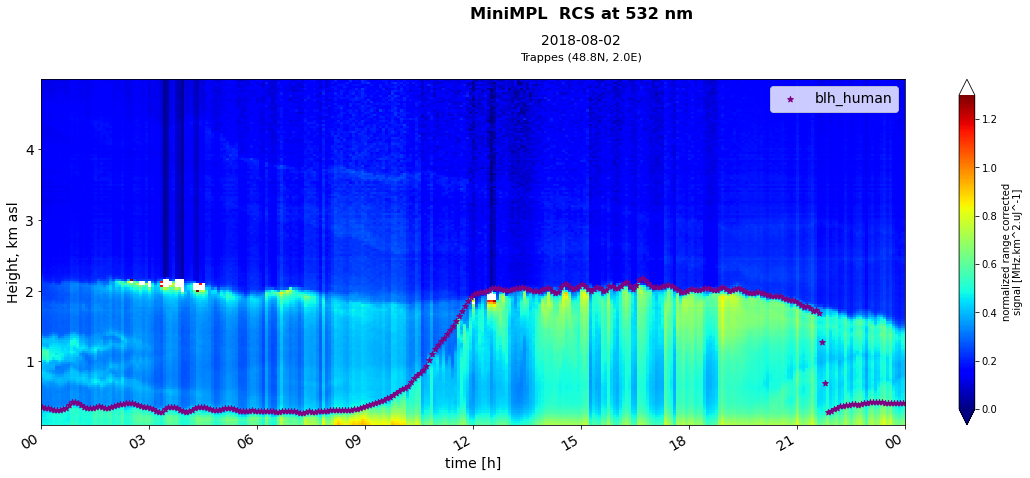

In [ ]:
filenames = ['/content/drive/MyDrive/TRABAJO DE GRADO - SCE/TFG/Datos de autores/kabl-master (Thomas Rieutord)/data-samples/lidar/DAILY_MPL_5025_20180802.nc'] 
             #'/content/drive/MyDrive/TRABAJO DE GRADO - SCE/TFG/Datos de autores/kabl-master (Thomas Rieutord)/data-samples/lidar/DAILY_MPL_5029_20180224.nc']
# filenames = [r'C:\Users\Sebastian\Googledrive2\Mi unidad\TRABAJO DE GRADO - SCE\TFG\Datos de autores\kabl-master (Thomas Rieutord)\data-samples\lidar\DAILY_MPL_5025_20180802.nc']   

# pdb.set_trace()

blh_human_path = '/content/drive/MyDrive/TRABAJO DE GRADO - SCE/TFG/Datos de autores/kabl-master (Thomas Rieutord)/data-samples/blh-from-human/'
# blh_human_path = '/Googledrive2/Mi unidad/TRABAJO DE GRADO - SCE/TFG/Datos de autores/kabl-master (Thomas Rieutord)/data-samples/blh-from-human'

for filename in filenames:
  date = filename.split('/')[-1].split('.')[0].split('_')[-1]

  ds = xr.load_dataset(filename)
  ds = ds.assign_coords(range=ds.range/1000)
  site = site_location(float(ds.lat.data[0]), float(ds.lon.data[0]))

  qt = 'RCS'
  wl = '532'
  signal_mode = ''
  channel = 'rcs_0'


  fig, axes = plt.subplots(nrows=1, figsize=(15,6))

  plot_as_me(ds, 
            channel, 
            axes, 
            qt, 
            wl,
            signal_mode, 
            attrs=ds.attrs, 
            vmax=1.3,
            vmin=0,
            )
  blh_human_filename = glob.glob(blh_human_path + '*' + date + '*')[0]
  blh_human = pd.read_csv(blh_human_filename)
  blh_human.t_values = blh_human.t_values.apply(pd.Timestamp.fromtimestamp)

  plt.scatter(blh_human.t_values, blh_human.blh_ref/1000, c='purple', s=None, marker='*', label='blh_human')

  plt.legend(fontsize=14)
  # pdb.set_trace()
  axes.tick_params(axis='both', which='major', labelsize=14)
  axes.tick_params(axis='both', which='minor', labelsize=14)
  axes.tick_params(axis='both', which='major', labelsize=14)
  axes.tick_params(axis='both', which='minor', labelsize=14)
  axes.set_xlabel('time [h]', fontsize=14)
  axes.set_ylabel('Height, km asl', fontsize=14)

In [ ]:
#### Muestreo de datos

In [ ]:
ds = ds.sel(range=slice(0, 2.5))

idt = np.arange(len(ds.time))
np.random.shuffle(idt)

X = np.apply_along_axis(norm_dataarray, 1, ds.rcs_0)
X = np.expand_dims(X, axis=2)

y = np.array(blh_human['blh_ref']/1000).reshape((-1, 1))
y = y / (2.5)



# ds.rcs_0.sel(range=slice(0, 2500)).shape, blh_human['blh_ref'].shap e

Text(0, 0.5, 'Altitude. km als')

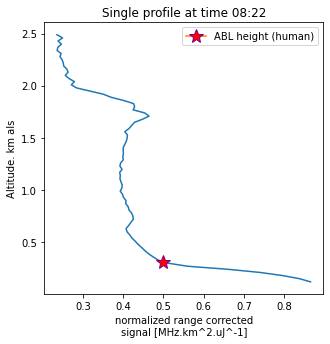

In [ ]:
# # plt.plot(np.ravel(y))
# plt.plot(ds.rcs_0[100].values)

figure = plt.figure(figsize=(5,5))

ds.rcs_0[100].plot(y='range')
plt.plot([0.5],y[100]*2.5, marker='*', ms=15, mfc='red', mec='purple', label='ABL height (human)')
plt.legend()

plt.title('Single profile at time 08:22')
plt.ylabel('Altitude. km als')

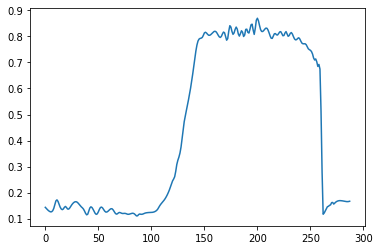

In [ ]:
plt.plot(y)

In [ ]:
input_layers_params = {'layer_1': {'n_neurons': np.shape(X)[1], 'activation_f': 'sigmoid'}}

# h_layers_params = {'layer_1': {'n_neurons': 10, 'activation_f': 'sigmoid'},
#                 'layer_2': {'n_neurons': 10, 'activation_f': 'sigmoid'},
#                 'layer_3': {'n_neurons': 10, 'activation_f': 'sigmoid'},
#                 'layer_4': {'n_neurons': 10, 'activation_f': 'sigmoid'},
#                 'layer_5': {'n_neurons': 10, 'activation_f': 'sigmoid'},
#                   } 
h_layers_params = {'layer_1': {'n_neurons': 8, 'activation_f': 'sigmoid'},
                   'layer_2': {'n_neurons': 8, 'activation_f': 'sigmoid'},
                   'layer_3': {'n_neurons': 8, 'activation_f': 'sigmoid'},
                   }


output_layers_params = {'layer_1': {'n_neurons': 1, 'activation_f': 'sigmoid'}}

In [ ]:
bias_flag=True
epochs = 15
input_layer, w_int = init_layers(1, layers_params=input_layers_params, last_layer_n=80, bias_flag=bias_flag)
hdn_layer, w_hdn = init_layers(3, layers_params=h_layers_params, last_layer_n=80, bias_flag=bias_flag)
output_layer, w_out = init_layers(1, layers_params=output_layers_params, last_layer_n=8, bias_flag=bias_flag)
# pdb.set_trace()

w = []
w.append(w_int[0])
for ws in w_hdn:
  w.append(ws)
w.append(w_out[0])
# print(w)

tolerancia = 1e-3
eta = 0.9

errors, grads, w = train(X, y, input_layer=input_layer, hdn_layer=hdn_layer, output_layer=output_layer, w=w, eta=eta, epochs=epochs, tol=tolerancia, bias_flag=bias_flag)
fixed_grads = fix_grads(grads=grads)

# print(w)
################# VISULIZACIÓN ###########################


# figure, axis = plt.subplots(len(fixed_grads)-1, 10, figsize=(5*5, 5 * (len(fixed_grads)-1)), squeeze=False)
# for layer in np.arange(1, len(fixed_grads), 1):
#   for neuron in range(fixed_grads[layer].shape[1]):

#     # pdb.set_trace()
#     mean_grad = np.reshape(np.ravel(fixed_grads[1][:, neuron]), (grads.shape[0] // len(X), len(X))).mean(axis=1)

#     axis[layer-1,neuron].plot(np.arange(fixed_grads[1].shape[0]), np.ravel(fixed_grads[layer][:, neuron]), linewidth=1.5, label='Error por patrón')#, marker='*', ms=15, mec='black', mfc='red')
#     axis[layer-1,neuron].plot(np.arange(grads.shape[0] // len(X))*len(X) + 0.5*len(X), mean_grad, linewidth=1.5, marker='*', ms=15, mec='black', mfc='red', label='Error promedio por época')
    
#     axis[layer-1,neuron].set_title('Neurona {}'.format(neuron), fontsize=14)
#     axis[layer-1,neuron].set_xlabel('Patrón', fontsize=14)
#     axis[layer-1,neuron].tick_params(labelsize=14)
#     axis[layer-1,neuron].set_ylim([-0.2, 0.2])

#     # axis[layer-1,neuron].legend(fontsize=14)
# plt.suptitle('Gradientes promedio capa oculta', fontsize=16)
# plt.show()

# mean_errors = np.reshape(errors, (np.shape(errors)[0] // len(X), len(X))).mean(axis=1)

# figure, axis = plt.subplots(1, len(output_layer[0]), figsize=(5*len(output_layer[0]), 5), squeeze=False)
# for neuron in range(1):

#   # pdb.set_trace()
#   axis[0,neuron].plot(np.arange(grads.shape[0] // len(X)*len(X)), np.ravel(errors), linewidth=2, label='Error por patrón')
#   axis[0,neuron].plot(np.arange(grads.shape[0] // len(X))*len(X) + 0.5*len(X), mean_errors, linewidth=2, marker='*', ms=15, mec='black', mfc='purple', label='Error promedio por época')

#   axis[0,neuron].set_title('Neurona {}'.format(neuron), fontsize=14)
#   axis[0,neuron].set_xlabel('Patrón', fontsize=14)
#   axis[0,neuron].tick_params(labelsize=14)
#   axis[0,neuron].set_ylim([-2, 2])

# plt.legend(fontsize=12)
# plt.suptitle('Error', fontsize=16)
# plt.show()

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10


In [ ]:
etas = [.2, 0.5, 0.9]
epochs = 8
tolerancia = 1e-2
bias_flag=False


for paramhdn in create_hdnlayers_params(l=5, n=20, activation_f_type='sigmoid')[::-1]:
  print(paramhdn, '\n=============================')
  for eta in etas:
    print('eta= ', eta, '\n============')
    input_layer, w_int = init_layers(1, layers_params=input_layers_params, last_layer_n=X.shape[1], bias_flag=bias_flag)
    hdn_layer, w_hdn = init_layers(len(paramhdn.keys()), layers_params=paramhdn, last_layer_n=X.shape[1], bias_flag=bias_flag)
    output_layer, w_out = init_layers(1, layers_params=output_layers_params, last_layer_n=paramhdn[list(paramhdn.keys())[-1]]['n_neurons'], bias_flag=bias_flag)
 
    # pdb.set_trace()
    w = []
    w.append(w_int[0])
    for ws in w_hdn:
      w.append(ws)
    w.append(w_out[0])


    errors, grads, w_ = train(X, y, input_layer=input_layer, hdn_layer=hdn_layer, output_layer=output_layer, w=w, eta=eta, epochs=epochs, tol=tolerancia, bias_flag=bias_flag)
    fixed_grads = fix_grads(grads=grads)



    ################# VISULIZACIÓN ###########################


    figure, axis = plt.subplots(len(fixed_grads)-1, 20, figsize=(4*5, 3 * (len(fixed_grads)-1)), squeeze=False)
    plt.subplots_adjust(hspace=0.5)
    fig.tight_layout()

    for layer in np.arange(1, len(fixed_grads), 1):
      for neuron in range(fixed_grads[layer].shape[1]):

        # pdb.set_trace()
        mean_grad = np.reshape(np.ravel(fixed_grads[layer][:, neuron]), (grads.shape[0] // len(X), len(X))).mean(axis=1)

        axis[layer-1,neuron].plot(np.arange(fixed_grads[layer].shape[0]), np.ravel(fixed_grads[layer][:, neuron]), linewidth=1.5, label='')#, marker='*', ms=15, mec='black', mfc='red')
        axis[layer-1,neuron].plot(np.arange(grads.shape[0] // len(X))*len(X) + 0.5*len(X), mean_grad, linewidth=1.5, marker='*', ms=15, mec='black', mfc='red', label='Error promedio por época')
        
        axis[layer-1,neuron].set_title('Neurona {}'.format(neuron), fontsize=14)
        axis[layer-1,neuron].set_xlabel('Patrón', fontsize=14)
        axis[layer-1,neuron].tick_params(labelsize=14)
        axis[layer-1,neuron].set_ylim([-0.015, 0.015])
        axis[layer-1,neuron].ticklabel_format(style='sci', scilimits=(0,0), axis='y')
        

        # axis[layer-1,neuron].legend(fontsize=14)


    plt.suptitle('Gradientes promedio capa oculta', fontsize=20)
    plt.show()

    mean_errors = np.reshape(errors, (np.shape(errors)[0] // len(X), len(X))).mean(axis=1)

    figure, axis = plt.subplots(1, len(output_layer[0]), figsize=(5*len(output_layer[0]), 5), squeeze=False)
    for neuron in range(len(output_layer[0])):

      # pdb.set_trace()
      axis[0,neuron].plot(np.arange(grads.shape[0] // len(X)*len(X)), np.ravel(errors), linewidth=2, label='Error por patrón')
      axis[0,neuron].plot(np.arange(grads.shape[0] // len(X))*len(X) + 0.5*len(X), mean_errors, linewidth=2, marker='*', ms=15, mec='black', mfc='purple', label='Error promedio por época')

      axis[0,neuron].set_title('Neurona {}'.format(neuron), fontsize=14)
      axis[0,neuron].set_xlabel('Patrón', fontsize=14)
      axis[0,neuron].tick_params(labelsize=14)
      axis[0,neuron].set_ylim([-1, 1])

    plt.legend(fontsize=12)
    plt.suptitle('Error', fontsize=16)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.